## SPEED DATING PROJECT

The dataset will be explored using analyses and visualizations. There is an introduction of the dataset:
- During the events, the attendees would have a four-minute "first date" with every other participant of the opposite sex.
- At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes:
  - Attractiveness
  - Sincerity
  - Intelligence
  - Fun
  - Ambition
  - Shared Interests.
- The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include:
  - Demographics
  - Dating habits
  - Self-perception across key attributes
  - Beliefs on what others find valuable in a mate
  - Lifestyle information

- Changes to the Data: In several analyses, the participants were given different instructions. For example, in most of the events, participants were given 100 points to distribute to the 6 attributes to show their priority. Some groups, however, were asked to rank the importance of the attributes on a 1-10 scale. Additionally, some participants’ scores do not add up to 100. In both cases, the data has been scaled to form a 0-100 distribution like all other participants.

See the `SpeedDating+Data+Key.doc` for the data dictionary and question key.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## DATA

In [2]:
df = pd.read_csv('Speed+Dating+Data.csv', encoding='unicode_escape')
df.head(10)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,1,1.0,0,1,1,1,10,7,NaN,2,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1,1.0,0,1,1,1,10,7,NaN,9,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [4]:
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [5]:
print(df.columns.tolist()) #all columns names

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'de

In [6]:
#Percentage of missing values by column
missing_values = round((df.isnull().sum()/len(df)*100),2).sort_values(ascending=False)
missing_values

num_in_3    92.03
numdat_3    82.14
expnum      78.52
sinc7_2     76.67
amb7_2      76.67
            ...  
wave         0.00
condtn       0.00
idg          0.00
gender       0.00
dec          0.00
Length: 195, dtype: float64

In [7]:
# Graph with percentages of missing values per variables
fig = px.bar(x=missing_values.index, y=missing_values.values, color_continuous_scale='Set3')

fig.update_layout(title="Percentage missing values in the dataset ", autosize=False,width=800, height=500)

fig.show()


In [8]:
# Rename columns
df.rename(columns={"condtn":"condition",
                     "mn_sat":"median sat",
                     "age_o":"age of partner",
                     "race_o":"race of partner",
                     "pf_o_att":"partner stated preference",
                     "dec_o":"partner's decision",
                     "imprace":"race importance",
                     "imprelig":"religion importance",
                     "date":"frequency of date",
                     }, inplace=True)

In [9]:
# Replace values
race_replacement={1:"Black/African American",
                 2: "European/Caucasion-American",
                 3: "Latino/Hispanic American",
                 4: "Asian/Pacific Islander/Asian-American",
                 5: "Native American",
                 6: "Other"}

field_replacement={1:"Law",
                   2:"Math",
                   3:"Social Science, Psychologist",
                   4:"Medican Science, Pharmaceuticals, and Bio Tech",
                   5:"Engineering",
                   6:"English/Creative Writing / Journalism",
                   7:"History/ Religion/ Philosophy",
                   8:"Business/Econ/Finance",
                   9:"Education, Academia",
                   10:"Biological Sciences / Chemistry/ Physics",
                   11:"Social Work",
                   12:"Undergrad/undecided",
                   13:"Political Science/ International Affairs",
                   14:"Film",
                   15:"Fine Arts / Arts Administration",
                   16:"Languages",
                   17:"Architecture",
                   18:"Other"}

career_replacement={1: "Lawyer",
                   2:  "Academic / Research",
                   3:  "Psychologist",
                   4:  "Doctor/Medicine",
                   5:  "Engineer",
                   6:  "Creative Arts/ Entertainment",
                   7:  "Banking / Consulting /Finance / Marketing/ Business /CEO/ Entrepreneur / Admin",
                   8:  "Real Estate",
                   9:  "International /Humanitarian Affairs",
                   10:  "Undecided",
                   11:  "Social Work",
                   12:  "Speech Pathology",
                   13:  "Politics",
                   14:  "Pro Sports / Athletics",
                   15:  "Other",
                   16:  "Journalism",
                   17:  "Architecture"}

decision_replacement={1:"Yes", 0:"No"}
length_replacement={1:"Too little",
                   2: "Too much",
                   3: "Just Right"}
goal_replacement={1:"Seemed like a fun night out",
                 2: "To meet new people",
                 3: "To get a date",
                 4:"Looking for serious relationship",
                 5:"To say I did it",
                 6: "Other"}

frequency_replacement={1:"Several times a week",
                      2: "Twice a week",
                      3: "Once a week",
                      4: "Twice a month",
                      5: "Once a month",
                      6: "Several times a year",
                      7: "Almost never"}

df["gender"].replace({0:"Female",1:"Male"}, inplace=True)
df["condition"].replace({1:"Limited choice", 2:"Extensive choice"}, inplace=True)
df["match"].replace({1:"Yes",0:"No"}, inplace=True)
df["samerace"].replace({1:"Yes",0:"No"},inplace=True)
df["race of partner"].replace(race_replacement, inplace=True)
df["partner's decision"].replace(decision_replacement, inplace=True)
df["field_cd"].replace(field_replacement, inplace=True)
df["race"].replace(race_replacement, inplace=True)
df["career_c"].replace(career_replacement, inplace=True)
df["length"].replace(length_replacement, inplace=True)
df["numdat_2"].replace({1:"Too few", 2: "Too many", 3: "Just Right"}, inplace=True)
df["date_3"].replace({1:"Yes", 2:"No", 0:np.nan}, inplace=True)
df["goal"].replace(goal_replacement, inplace=True)
df["frequency of date"].replace(frequency_replacement, inplace=True)
df["go_out"].replace(frequency_replacement, inplace=True)
df["dec"].replace({1:"Yes",0:"No"},inplace=True)

In [10]:
#check for missin values specific columns to future analysis
df[['gender','samerace',"goal","match",'frequency of date']].isnull().sum()

gender                0
samerace              0
goal                 79
match                 0
frequency of date    97
dtype: int64

In [11]:
#there is 79 null values at 'goal' column. replace with 'unknown' for future analysis
df['goal'].fillna('unknown', inplace=True)
#there is 97 null values at 'goal' column. replace with 'unknown' for future analysis
df['frequency of date'].fillna('unknown', inplace=True)


# ANALYSIS

## Analysis of the individuals

In [12]:
#How many participants were there in the speed dating?
dataset_unique = df.drop_duplicates(subset=['iid'], keep="first").copy() #Df with one entry per individual
total_participants = len(dataset_unique['iid'].value_counts())
print(f'There are overall {total_participants} participants')
display(dataset_unique.gender.value_counts(dropna=False))

There are overall 551 participants


gender
Male      277
Female    274
Name: count, dtype: int64

In [13]:
#age distribution per gender
fig = px.histogram(dataset_unique, x='age', color='gender', color_discrete_sequence=['skyblue', 'salmon'],
                   barmode='group', title='Age Distribution by Gender', labels={'age': 'Age', 'count': 'Count'},
                   category_orders={'gender': ['Male', 'Female']})
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

In [14]:
# graph Race Distribution per Gender
fig = px.histogram(dataset_unique, x='race', color='gender', 
                   color_discrete_sequence=['salmon', 'skyblue'], 
                   title='Race Distribution per Gender',
                   labels={'race': 'Race', 'gender': 'Gender', 'count': 'Frequency'},
                   barmode='group')

fig.update_layout(xaxis_title='Race', yaxis_title='Frequency')
fig.show()


In this speed dating dataset, we observe a diverse distribution in terms of participants' race/ethnicity. The 'European/Caucasion-American' group stands out with 304 participants, and the 'Asian/Pacific Islander/Asian-American' group with 136 participants, suggesting a significant representation of these two ethnic categories in the dataset

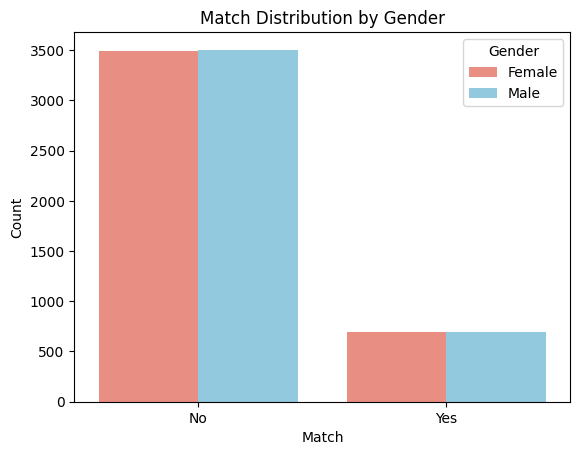

In [15]:
# colors for graph
custom_palette = {'Male': 'skyblue', 'Female': 'salmon'}

# graph
sns.countplot(x='match', hue='gender', data=df, palette=custom_palette)

# add labels
plt.xlabel('Match')
plt.ylabel('Count')
plt.title('Match Distribution by Gender')

# show
plt.legend(title='Gender')
plt.show()

Within this group of individuals who participated in the experiment, it can be clearly observed that there is a majority of negative responses.

# why people participate?

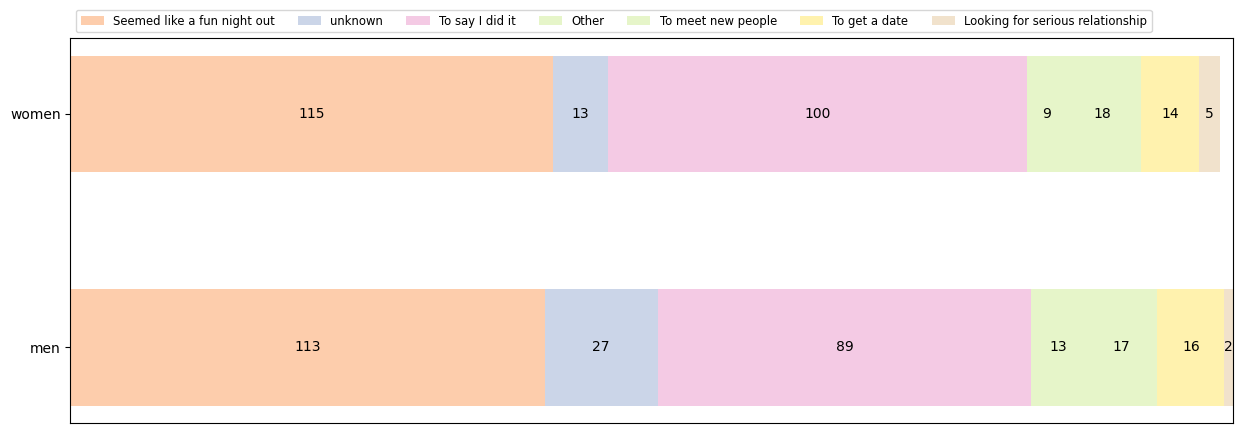

In [16]:
# reasons to plot at graph
reason_one = dataset_unique['gender'].loc[(dataset_unique["gender"] == "Female") & (dataset_unique["goal"] == "Seemed like a fun night out")].count()
reason_two = dataset_unique['gender'].loc[(dataset_unique["gender"] == "Female") & (dataset_unique["goal"] == "To get a date")].count()
reason_three = dataset_unique['gender'].loc[(dataset_unique["gender"] == "Female") & (dataset_unique["goal"] == "To meet new people")].count()
reason_four = dataset_unique['gender'].loc[(dataset_unique["gender"] == "Female") & (dataset_unique["goal"] == "Looking for serious relationship")].count()
reason_five = dataset_unique['gender'].loc[(dataset_unique["gender"] == "Female") & (dataset_unique["goal"] == "To say I did it")].count()
reason_six = dataset_unique['gender'].loc[(dataset_unique["gender"] == "Female") & (dataset_unique["goal"] == "Other")].count()
reason_seven = dataset_unique['gender'].loc[(dataset_unique["gender"] == "Female") & (dataset_unique["goal"] == "unknown")].count()

reason_one_m = dataset_unique['gender'].loc[(dataset_unique["gender"] == "Male") & (dataset_unique["goal"] == "Seemed like a fun night out")].count()
reason_two_m = dataset_unique['gender'].loc[(dataset_unique["gender"] == "Male") & (dataset_unique["goal"] == "To get a date")].count()
reason_three_m = dataset_unique['gender'].loc[(dataset_unique["gender"] == "Male") & (dataset_unique["goal"] == "To meet new people")].count()
reason_four_m = dataset_unique['gender'].loc[(dataset_unique["gender"] == "Male") & (dataset_unique["goal"] == "Looking for serious relationship")].count()
reason_five_m = dataset_unique['gender'].loc[(dataset_unique["gender"] == "Male") & (dataset_unique["goal"] == "To say I did it")].count()
reason_six_m = dataset_unique['gender'].loc[(dataset_unique["gender"] == "Male") & (dataset_unique["goal"] == "Other")].count()
reason_seven_m = dataset_unique['gender'].loc[(dataset_unique["gender"] == "Male") & (dataset_unique["goal"] == "unknown")].count()

category_names = set(dataset_unique['goal'].astype(str))  
results = {
    'women': [reason_one,reason_two,reason_three,reason_four,reason_five,reason_six,reason_seven],
    'men': [reason_one_m,reason_two_m,reason_three_m,reason_four_m,reason_five_m,reason_six_m,reason_seven_m]
}

def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('Pastel2')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'black'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

survey(results, category_names)
plt.show()

We can see certain similar values between men and women. The majority aim to meet new people or chose not to specify the reason for their participation. An interesting difference lies in the category 'Seemed like a fun night out,' where there are more men with that objective

Let's check the frequency of date per gender

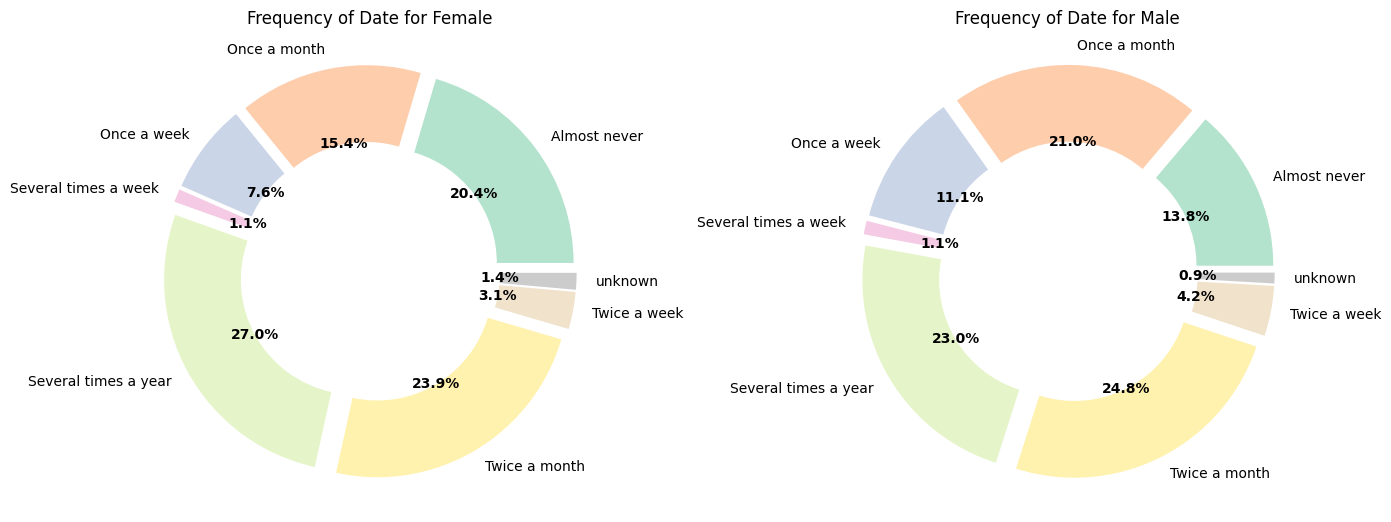

In [17]:
#2 graph of frequency of date
# frecuency of date per gender
frequency_counts_general = df.groupby('gender')['frequency of date'].value_counts().unstack()
fig, axes = plt.subplots(1, 2, figsize=(14, 7))


# graph
for i, gender in enumerate(frequency_counts_general.index):
    ax = axes[i]
    frequencies = frequency_counts_general.loc[gender]
    
    # Adjust start angle and explode one wedge
    explode = (0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08) if gender == 'Male' else (0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08)
    
    wedges, labels, autopct = ax.pie(frequencies, labels=frequencies.index, autopct='%1.1f%%', colors=plt.cm.Pastel2.colors, explode=explode, wedgeprops={'width': 0.4})
    
    plt.setp(autopct, fontsize=10, weight='bold', ha='center')
    
    ax.set_title(f'Frequency of Date for {gender}')
    
    # Agregar un círculo en el centro para crear un gráfico de dona
    ax.add_artist(plt.Circle((0, 0), 0.6, color='white'))

plt.tight_layout()


In this graph, a fairly similar distribution can be observed regarding the frequency of dating for each gender. The categories with the most differences are "Once a month," where there is a majority of men who chose this response, and on the other hand, there is a majority of women who said they date "Almost never".


Now let's look at how matches are distributed across different frequencies of dating.

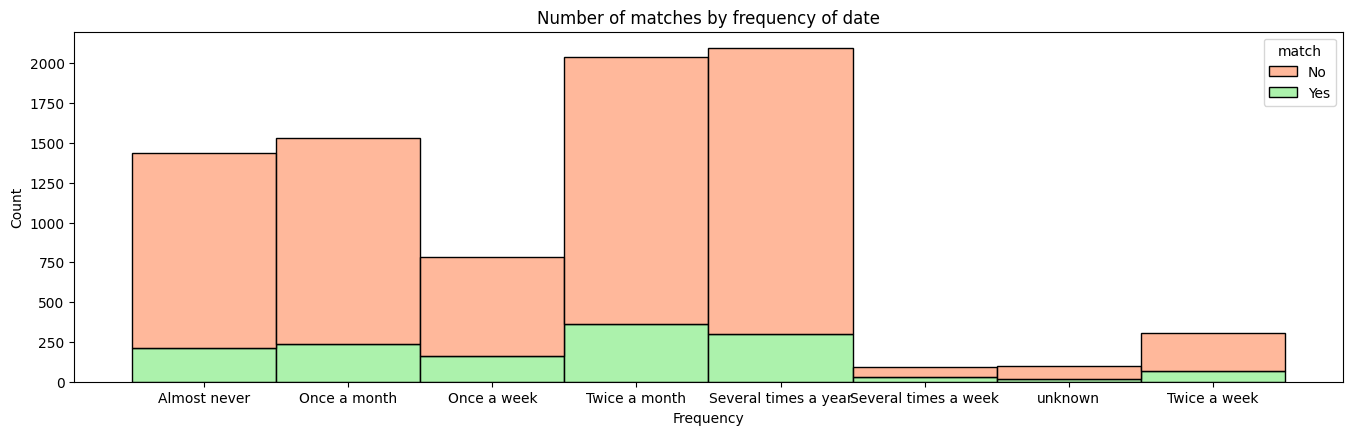

Category: Almost never, Match Percentage: 14.78%
Category: Once a month, Match Percentage: 15.51%
Category: Once a week, Match Percentage: 20.31%
Category: Twice a month, Match Percentage: 17.89%
Category: Several times a year, Match Percentage: 14.18%
Category: Several times a week, Match Percentage: 30.85%
Category: unknown, Match Percentage: 16.49%
Category: Twice a week, Match Percentage: 21.10%


In [18]:
# matches distribution per frequency of date
plt.figure(figsize=(36,10))

#Countplot
plt.subplot(221)
sns.histplot(data=df, x='frequency of date', hue='match', palette= ['lightsalmon','lightgreen'], multiple='stack')
plt.ylabel('Count',color='black')
plt.xlabel('Frequency',color='black')
plt.title('Number of matches by frequency of date', color='black')


plt.show()

plt.show()

# percentage of matches per category of frequency of date

categories = df['frequency of date'].unique()# Get unique categories from the 'frequency of date' column

# Initialize lists to store results
category_labels = []
match_percentages = []

# Iterate over each category
for category in categories:
    category_data = df[df['frequency of date'] == category]# Filter DataFrame for the current category
    total_observations = category_data.shape[0]# Count total observations for the category
    matches_yes_count = (category_data['match'] == 'Yes').sum()# Count 'match=yes' instances for the category

    # Calculate match percentage for the category
    match_percentage = (matches_yes_count / total_observations) * 100 if total_observations > 0 else 0.0
    
    # Store category label and match percentage
    category_labels.append(category)
    match_percentages.append(match_percentage)

    # Print results for the current category
    print(f"Category: {category}, Match Percentage: {match_percentage:.2f}%")


We can observe that the category 'Several times a week' has a high percentage of matches within its own category. This could be because people are more available to go on dates, which aligns with the notion that those who date 'Several times a year' are less predisposed to making a match.

## Importance of attributes per participant

In [19]:
#total number of occurrences of values 6, 7, 8, and 9
total_6_7_8_9 = df['wave'].isin([6, 7, 8, 9]).sum()

#total number of rows in the DataFrame
total_rows = len(df)

#percentage of waves 6, 7, 8, 9
percentage_6_7_8_9 = (total_6_7_8_9 / total_rows) * 100

# Calculate the percentage of the rest
percentage_rest = 100 - percentage_6_7_8_9

print(f"Percentage of occurrences of values 6, 7, 8, and 9: {percentage_6_7_8_9}%")
print(f"Percentage of the rest: {percentage_rest}%")

# select rows without values 6, 7, 8 o 9 at 'wave' column
same_scale_df = (df['wave'] <= 5) | (df['wave'] >= 10)
df_same_scale = df[same_scale_df]

Percentage of occurrences of values 6, 7, 8, and 9: 18.64406779661017%
Percentage of the rest: 81.35593220338983%


We will work with waves 1-5 and 10-21 to facilitate analysis because different scoring methods have been used:
- Waves 1-5 and 10-21 have distributed 100 points among the different options.
- Waves 6-9 have been scored on a scale of 1 to 10 for each option

Also as we check before that means we are working with more than 80% of the data.

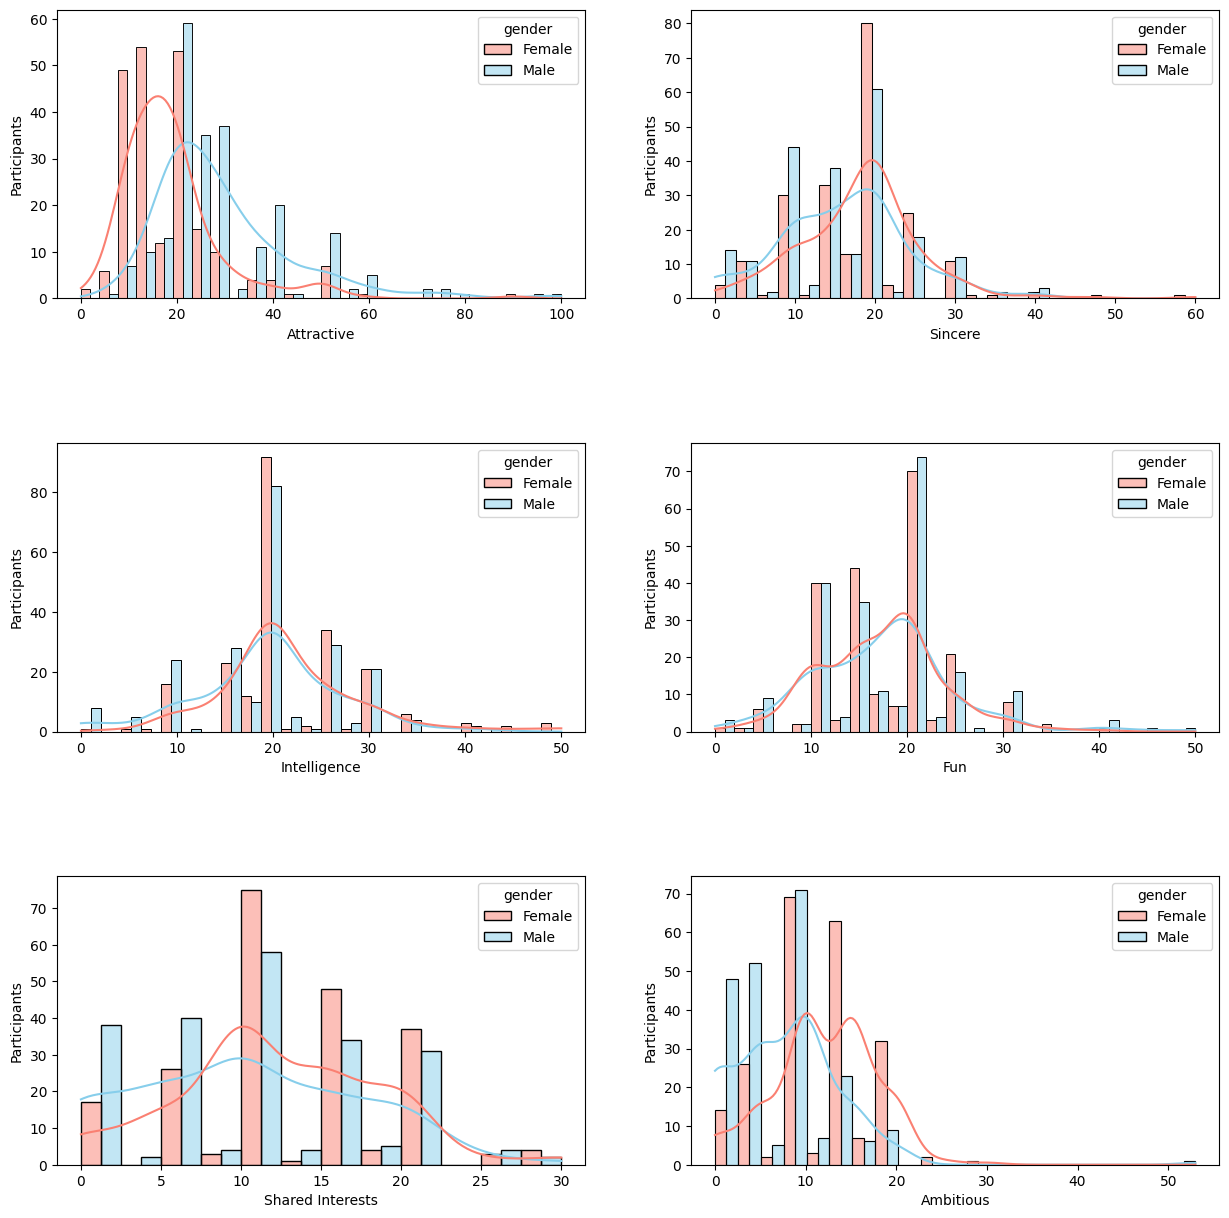

In [20]:
#what you look for in the oppossite sex?

df_unique_same_scale = df_same_scale.drop_duplicates(subset=['iid'], keep="first").copy()
# create graphs 2 columns 3 rows
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# space between
plt.subplots_adjust(hspace=0.5)

# each hist
sns.histplot(data=df_unique_same_scale, x='attr1_1', hue='gender', multiple="dodge", kde=True, palette=['salmon', 'skyblue'], ax=axes[0, 0]).set(xlabel='Attractive', ylabel='Participants')
sns.histplot(data=df_unique_same_scale, x='sinc1_1', hue='gender', multiple="dodge", kde=True, palette=['salmon', 'skyblue'], ax=axes[0, 1]).set(xlabel='Sincere', ylabel='Participants')
sns.histplot(data=df_unique_same_scale, x='intel1_1', hue='gender', multiple="dodge", kde=True, palette=['salmon', 'skyblue'], ax=axes[1, 0]).set(xlabel='Intelligence', ylabel='Participants')
sns.histplot(data=df_unique_same_scale, x='fun1_1', hue='gender', multiple="dodge", kde=True, palette=['salmon', 'skyblue'], ax=axes[1, 1]).set(xlabel='Fun', ylabel='Participants')
sns.histplot(data=df_unique_same_scale, x='shar1_1', hue='gender', multiple="dodge", kde=True, palette=['salmon', 'skyblue'], ax=axes[2, 0]).set(xlabel='Shared Interests', ylabel='Participants')
sns.histplot(data=df_unique_same_scale, x='amb1_1', hue='gender', multiple="dodge", kde=True, palette=['salmon', 'skyblue'], ax=axes[2, 1]).set(xlabel='Ambitious', ylabel='Participants')

plt.show()

- Men and women give practically the same importance to the attributes of "sincerity," "fun," and "intelligence."
- While for the attribute of "ambition," we see that women grant it a little more importance compared to men, 
the opposite happens in the valuation of the attribute of "beauty," although the difference is not very significant.
- Finally, in the analysis of the attribute of "shared interests" we see that the valuations vary greatly according to the individual.

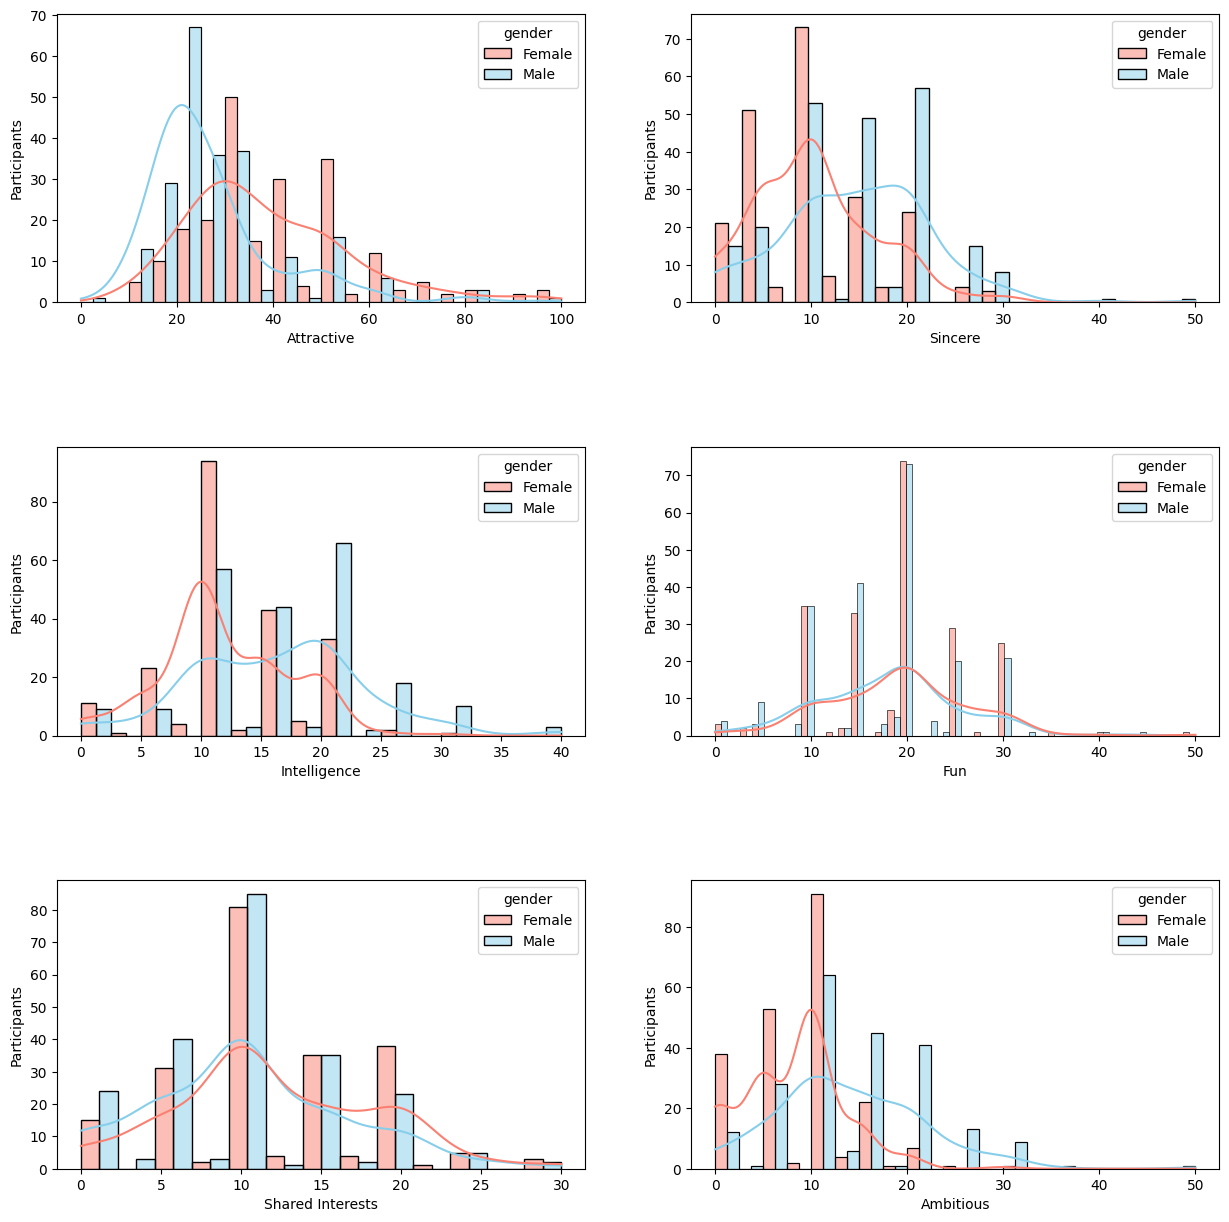

In [21]:
#What do you think the opposite sex looks for in a date
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# space between
plt.subplots_adjust(hspace=0.5)

# each hist
sns.histplot(data=df_unique_same_scale, x='attr2_1', hue='gender', multiple="dodge", kde=True, palette=['salmon', 'skyblue'], ax=axes[0, 0]).set(xlabel='Attractive', ylabel='Participants')
sns.histplot(data=df_unique_same_scale, x='sinc2_1', hue='gender', multiple="dodge", kde=True, palette=['salmon', 'skyblue'], ax=axes[0, 1]).set(xlabel='Sincere', ylabel='Participants')
sns.histplot(data=df_unique_same_scale, x='intel2_1', hue='gender', multiple="dodge", kde=True, palette=['salmon', 'skyblue'], ax=axes[1, 0]).set(xlabel='Intelligence', ylabel='Participants')
sns.histplot(data=df_unique_same_scale, x='fun2_1', hue='gender', multiple="dodge", kde=True, palette=['salmon', 'skyblue'], ax=axes[1, 1]).set(xlabel='Fun', ylabel='Participants')
sns.histplot(data=df_unique_same_scale, x='shar2_1', hue='gender', multiple="dodge", kde=True, palette=['salmon', 'skyblue'], ax=axes[2, 0]).set(xlabel='Shared Interests', ylabel='Participants')
sns.histplot(data=df_unique_same_scale, x='amb2_1', hue='gender', multiple="dodge", kde=True, palette=['salmon', 'skyblue'], ax=axes[2, 1]).set(xlabel='Ambitious', ylabel='Participants')

plt.show()

In sincerity, we can observe that women believe the opposite sex seeks less sincerity than what they themselves are looking for.
Similarly, in intelligence, while both sexes had a similar score in the 'what are you looking for' column, women believe that men attribute less importance to intelligence than they actually do.
'Shared interests' is one of the characteristics where there is the most agreement between what individuals are looking for and what they believe the opposite sex is looking for.

## Interest per Gender


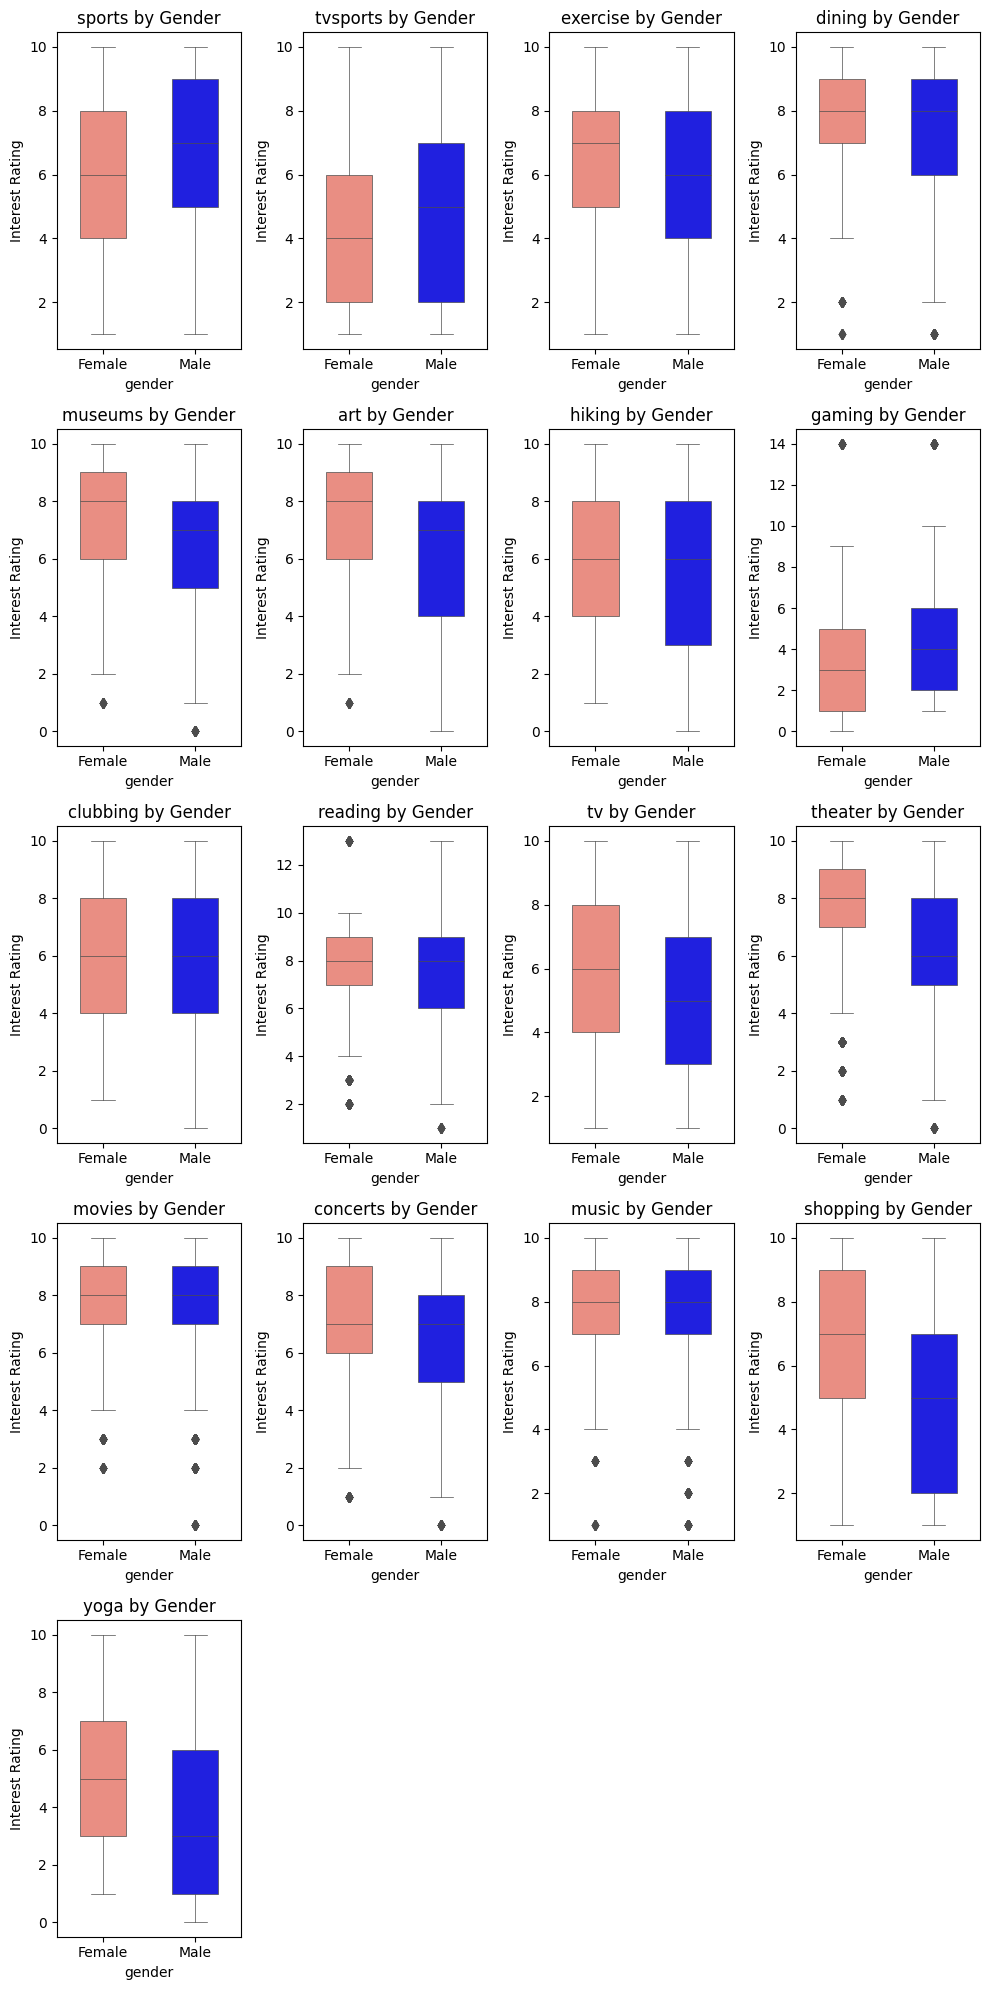

In [22]:
# list of interets
interests = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
             'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 
             'music', 'shopping', 'yoga']
palette = {'Male': 'blue', 'Female': 'salmon'}
# Creamos datos de ejemplo para df (solo para demostración)
fig, axes = plt.subplots(len(interests)//4 + 1, 4, figsize=(10, 20))

for i, interest in enumerate(interests):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.boxplot(x='gender', y=interest, data=df, orient='v', palette=palette, ax=ax, linewidth=0.5,width=0.5)  # Set linewidth to 0.5
    ax.set_title(f'{interest} by Gender')
    ax.set_ylabel('Interest Rating')

# Remove empty subplots
if len(interests) % 4 != 0:
    for j in range(len(interests) % 4, 4):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()



These graphs are useful for analyzing whether the interests of participants of the opposite sex coincide or not. There are interests where the majority of participants coincide with high scores in dining ,movies and music, which can be interesting information for, for example, a first date

## Race Analysis

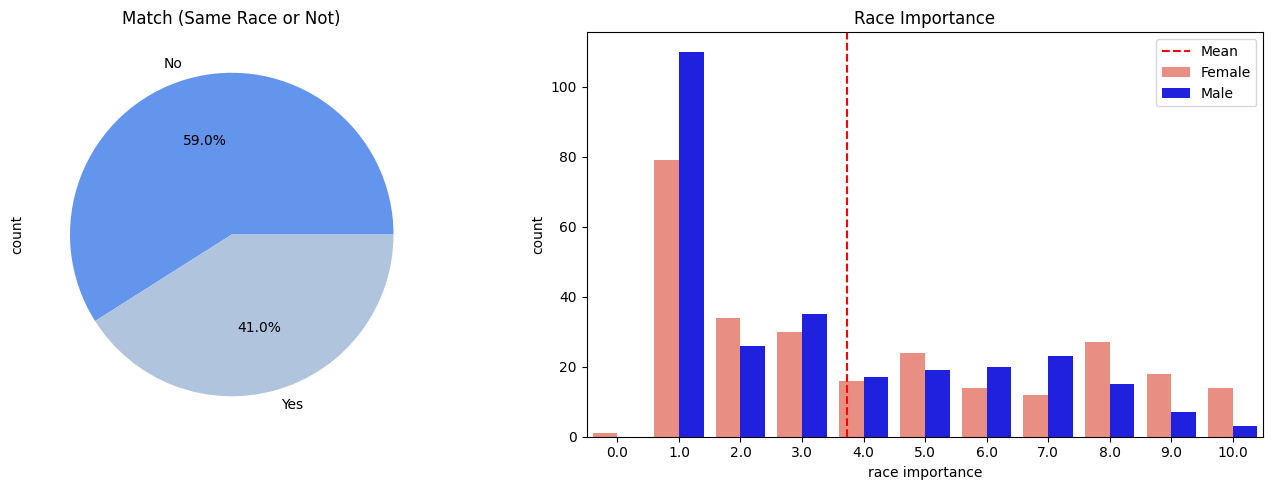

In [34]:
# Filter the data for the chart
df_filtered = df[df['match'] == 'Yes']

# Calculate the mean of 'race importance'
mean_race_importance = dataset_unique['race importance'].mean()

# Create figure and axes for subplots
fig, axs = plt.subplots(ncols=2, figsize=(14, 5))

# Chart 1: Match (Same Race or Not) (pie chart)
df_filtered['samerace'].value_counts().plot(kind='pie', ax=axs[0], colors=['cornflowerblue', 'lightsteelblue'], autopct='%1.1f%%')
axs[0].set(title='Match (Same Race or Not)')

# Chart 2: Race Importance (countplot)
sns.countplot(x="race importance", hue="gender", palette=['salmon', 'blue'], data=dataset_unique, ax=axs[1]).set(title='Race Importance')

# Add a horizontal line for the mean value of 'race importance'
axs[1].axvline(mean_race_importance, color='red', linestyle='--', label='Mean')
axs[1].legend()

# Adjust layout to avoid overlaps
plt.tight_layout()

# Show the chart
plt.show()


In these visualizations, we aim to scrutinize the influence of race on forming a match and its alignment with participants' perceived importance of racial compatibility.

- Graph 1: Matches marked as 'Yes' where participants share the same race.
- Graph 2: Importance of race with 'mean' line


It is noticeable that the majority of matches do not involve individuals of the same race, although a significant proportion does. It can be inferred that the results depicted in Graph 1 are well-reflected by participants' reported emphasis on race, where the majority do not assign significant importance to racial compatibility, but a notable minority do. 

In [ ]:

df_numdat_3 = df[df['numdat_3'] > 0]


# Graph
fig = px.histogram(df_numdat_3, x='numdat_3', color='gender',color_discrete_sequence=['salmon', 'skyblue'], barmode='group',
                   title='Dates with different individuals after the event',
                   labels={'numdat_3': 'How many partners', 'gender': 'Gender', 'count': 'Frequency'})

fig.update_layout(width=800, height=400, showlegend=True)
fig.show()


The majority of individuals only called one person after all the waves they had, and women were the ones who did it the most once. However, on the other hand, it can be seen that many men called more than one person.

-------------------------------------------------------------------------------------------------------------

Finally, we can conclude that the majority of people in this situation are interested in meeting new people. The attributes that people believe the opposite sex is looking for and what they themselves are looking for are quite aligned.

Additionally, we observe that individuals who date 'Several times a week' show a higher predisposition to making a match, likely due to their increased availability and engagement in dating activities.

We can also observe certain patterns within the interests, which could be interesting to showcase when presenting oneself in an application or speed dating event. This can be linked with the previous assertion that the attributes are quite aligned, and 'shared interest' is one of them.

Lastly, it's evident that race holds a certain importance when it comes to making a match.